In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import structure
import solver

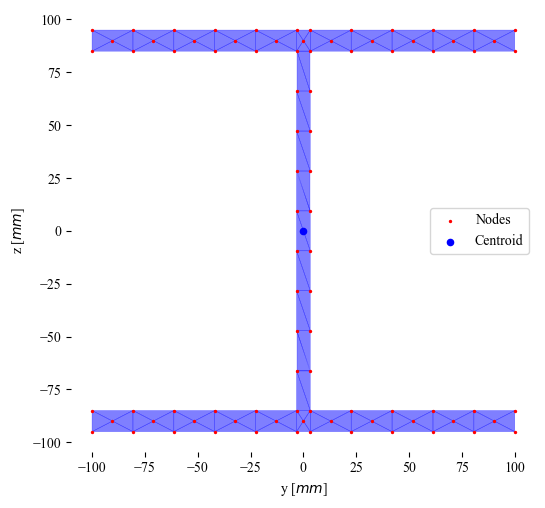

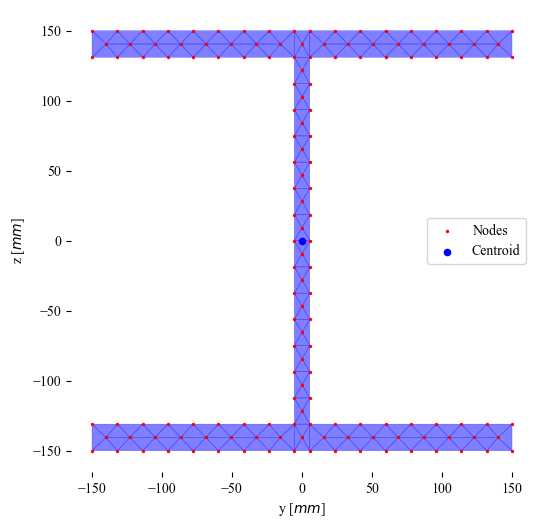

In [2]:
HEA_200 = H_beam(web_width     =   6.5,
                 web_height    = 170.0,
                 flange_width  = 200.0,
                 flange_height =  10.0)
beam = Mesh(HEA_200, mesh_type="triangle", mesh_size=20)
beam.plot()

HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
column = Mesh(HEB_300, mesh_type="triangle", mesh_size=20)
column.plot()


In [3]:
struc = structure.Frame(column            = column, 
						beam              = beam, 
						number_of_stories = 1, 
						story_height      = 3000, 
						story_width       = 7000,
						load_DOFs         = [12],
						nodal_loads       = [1],
						number_of_sections_per_elemnt = 4)

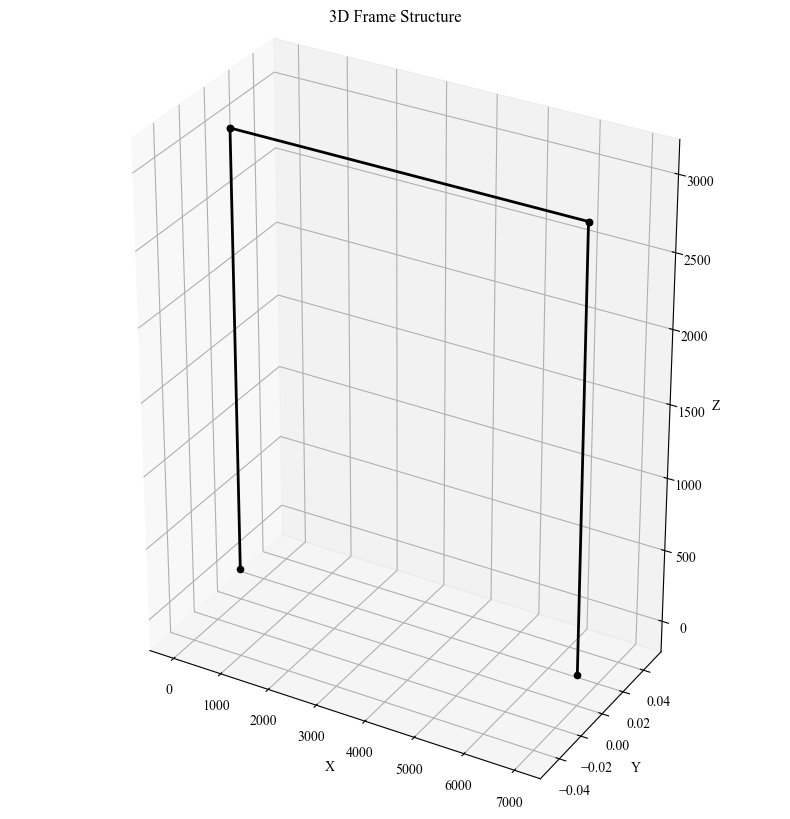

In [ ]:
non_linear_solver = solver.Nonlinear(struc, constraint="Load")

In [5]:
increments = np.zeros(100)
increments.fill(5000)

u_history, lambda_history = non_linear_solver.solve(increments)

  0%|          | 0/100 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
         Beam Element  2
            Element iteration  0
         Beam Element  3
            Element iteration  0
fext: 1.0
      Residuals Norm  6.473699834099905e-08
NR Converged!
----------------------------------------------
Load step 2 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
         Beam Element  2
            Element iteration  0
         Beam Element  3
            Element iteration  0
fext: 1.0
      Residuals Norm  6.482725742162923e-08
NR Converged!
----------------------------------------------
Load step 3 of 100
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
         Beam Element  2
            Element iteration  0
         Beam Element  3
            Element iteration  0
fext: 1.0
      Residuals Norm  6.47

3.248222954919032 45000.0
101


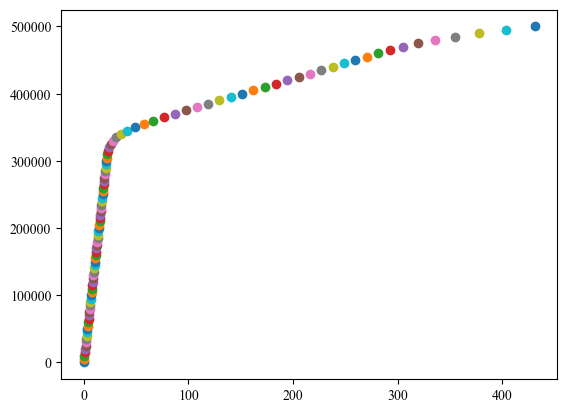

In [6]:
print(u_history[9][6*2], lambda_history[9])
print(len(lambda_history))
for i in range(len(lambda_history)):
	plt.scatter(u_history[i][6*2], lambda_history[i])

In [7]:
non_linear_solver.displacements = non_linear_solver.structure.displacements
non_linear_solver.forces        = np.dot(non_linear_solver.structure.K_global, non_linear_solver.structure.displacements)

non_linear_solver.print_nodal_displacements_and_forces()

--------------------------------------
Node 0
          Displacement
u [mm]        0.000000
v [mm]        0.000000
w [mm]        0.000000
θx [rad]      0.000000
θy [rad]      0.000000
θz [rad]      0.000000
          Internal Force
Fx [kN]         0.000000
Fy [kN]         0.000000
Fz [kN]         0.000000
Mx [kNm]        0.000000
My [kNm]        0.000000
Mz [kNm]        0.000000
--------------------------------------
Node 1
          Displacement
u [mm]        0.000000
v [mm]        0.000000
w [mm]        0.000000
θx [rad]      0.000000
θy [rad]      0.000000
θz [rad]      0.000000
          Internal Force
Fx [kN]         0.000000
Fy [kN]         0.000000
Fz [kN]         0.000000
Mx [kNm]        0.000000
My [kNm]        0.000000
Mz [kNm]        0.000000
--------------------------------------
Node 2
          Displacement
u [mm]      430.914162
v [mm]       -0.000000
w [mm]        0.447539
θx [rad]      0.000000
θy [rad]      0.157129
θz [rad]      0.000252
          Internal Force
Fx [